# Nome
 - Leão Pereira

#R.A
 - 22200115

# 1) Carregando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import kstest
import matplotlib.pyplot as plt

# 2) Carregar base de dados real.
## Você deve estar logado no Moodle para acessar:

[Link da base de dados](https://salaonline.ceub.br/pluginfile.php/244385/mod_resource/content/1/BaseDadosP2.csv)

## Fazer upload dos dados no Google Colab

In [2]:
df = pd.read_csv("/content/BaseDadosP2.csv", sep=";", decimal=".")
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# 2.1) Criar a variavel dependente Y e as variaveis independentes X

In [3]:
# creating feature variables
X = df.drop('alcohol',axis= 1)
y = df['alcohol']

# 3) Divisão em base de treino e base de validação

In [4]:
# Dividir os dados em amostras de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# 4) Definindo os modelos de regressão

In [5]:
# Definir os modelos de regressão
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
ridge_regression = Ridge()

# 5) Ajustar os modelos - na base de treino

In [6]:
# Ajustar os modelos aos dados de treinamento
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
ridge_regression.fit(X_train, y_train);

# 6) Fazer previsão - na base de validação

In [7]:
# Fazer previsões nos dados de validação
linear_pred = linear_regression.predict(X_val)
tree_pred = decision_tree.predict(X_val)
ridge_pred = ridge_regression.predict(X_val)

# 7) Medidas de capacidade preditiva

In [8]:
# Calcular as medidas de capacidade preditiva na amostra de validação
linear_mse = mean_squared_error(y_val, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_val, linear_pred)
linear_r2 = r2_score(y_val, linear_pred)
linear_corr = np.corrcoef(y_val, linear_pred)[0, 1]

tree_mse = mean_squared_error(y_val, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_val, tree_pred)
tree_r2 = r2_score(y_val, tree_pred)
tree_corr = np.corrcoef(y_val, tree_pred)[0, 1]

ridge_mse = mean_squared_error(y_val, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_val, ridge_pred)
ridge_r2 = r2_score(y_val, ridge_pred)
ridge_corr = np.corrcoef(y_val, ridge_pred)[0, 1]

# 8) Mostrando os resultados

In [9]:
# Exibir os resultados
print('Linear Regression:')
print(f'  MSE             = {linear_mse:.2f}')
print(f'  RMSE            = {linear_rmse:.2f}')
print(f'  MAE             = {linear_mae:.2f}')
print(f'  R2 Score        = {linear_r2:.2f}')
print(f'  Coef. de Corr.  = {linear_corr:.2f}\n')

print('Decision Tree:')
print(f'  MSE             = {tree_mse:.2f}')
print(f'  RMSE            = {tree_rmse:.2f}')
print(f'  MAE             = {tree_mae:.2f}')
print(f'  R2 Score        = {tree_r2:.2f}')
print(f'  Coef. de Corr.  = {tree_corr:.2f}\n')

print('Ridge Regression:')
print(f'  MSE             = {ridge_mse:.2f}')
print(f'  RMSE            = {ridge_rmse:.2f}')
print(f'  MAE             = {ridge_mae:.2f}')
print(f'  R2 Score        = {ridge_r2:.2f}')
print(f'  Coef. de Corr.  = {ridge_corr:.2f}\n')

Linear Regression:
  MSE             = 0.78
  RMSE            = 0.88
  MAE             = 0.70
  R2 Score        = 0.47
  Coef. de Corr.  = 0.69

Decision Tree:
  MSE             = 0.35
  RMSE            = 0.59
  MAE             = 0.34
  R2 Score        = 0.76
  Coef. de Corr.  = 0.88

Ridge Regression:
  MSE             = 0.80
  RMSE            = 0.89
  MAE             = 0.70
  R2 Score        = 0.46
  Coef. de Corr.  = 0.68



# 9) Plotando os resultados

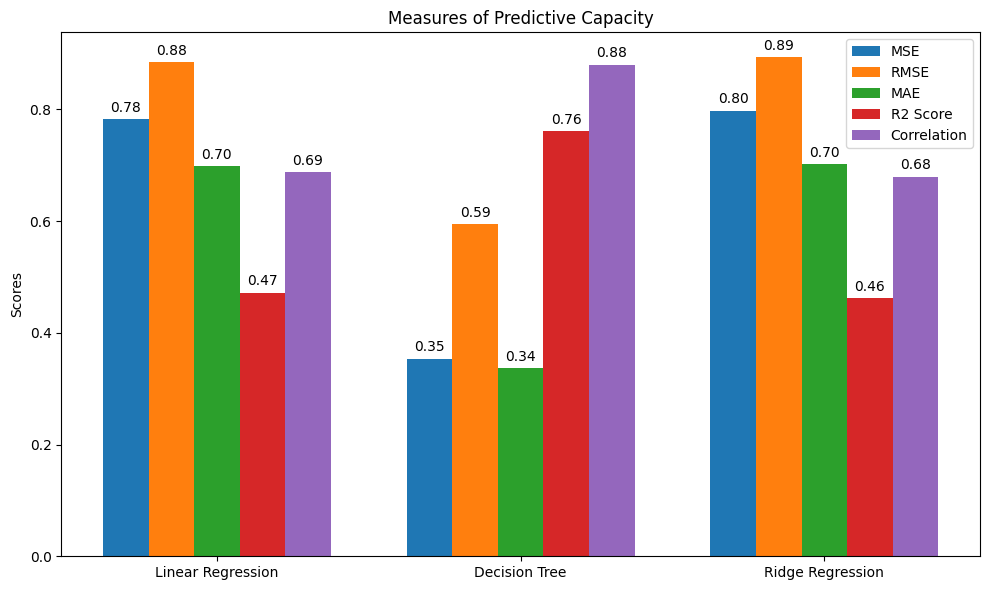

In [10]:
# Preparar os dados para o gráfico de barras
models = ['Linear Regression', 'Decision Tree', 'Ridge Regression']
mse_scores = [linear_mse, tree_mse, ridge_mse]
rmse_scores = [linear_rmse, tree_rmse, ridge_rmse]
mae_scores = [linear_mae, tree_mae, ridge_mae]
r2_scores = [linear_r2, tree_r2, ridge_r2]
corr_scores = [linear_corr, tree_corr, ridge_corr]

# Plotar o gráfico de barras
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, mse_scores, width, label='MSE')
rects2 = ax.bar(x + width, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + 2 * width, mae_scores, width, label='MAE')
rects4 = ax.bar(x + 3 * width, r2_scores, width, label='R2 Score')
rects5 = ax.bar(x + 4 * width, corr_scores, width, label='Correlation')

ax.set_ylabel('Scores')
ax.set_title('Measures of Predictive Capacity')
ax.set_xticks(x + 2 * width)
ax.set_xticklabels(models)
ax.legend()

# Adicionar os valores nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.tight_layout()
plt.show()

# 10) Análise de resíduos

## 10.1) Resíduo médio

In [11]:
# Calcular os resíduos
linear_residuals = y_val - linear_pred
tree_residuals = y_val - tree_pred
ridge_residuals = y_val - ridge_pred

print('Resíduo médio:')
print(f'  Linear             = {linear_residuals.mean():.4f}')
print(f'  Árvore            = {tree_residuals.mean():.4f}')
print(f'  Ridge             = {ridge_residuals.mean():.4f}')


Resíduo médio:
  Linear             = -0.0251
  Árvore            = 0.0197
  Ridge             = -0.0215


## 10.2) Desvio padrão dos desvios


In [12]:
# Calcular os resíduos
linear_residuals = y_val - linear_pred
tree_residuals = y_val - tree_pred
ridge_residuals = y_val - ridge_pred

print('desvio padrão:')
print(f'  Linear             = {linear_residuals.std():.4f}')
print(f'  Árvore            = {tree_residuals.std():.4f}')
print(f'  Ridge             = {ridge_residuals.std():.4f}')

desvio padrão:
  Linear             = 0.8842
  Árvore            = 0.5946
  Ridge             = 0.8931


# 11) Análise gráfica e teste de hipótese

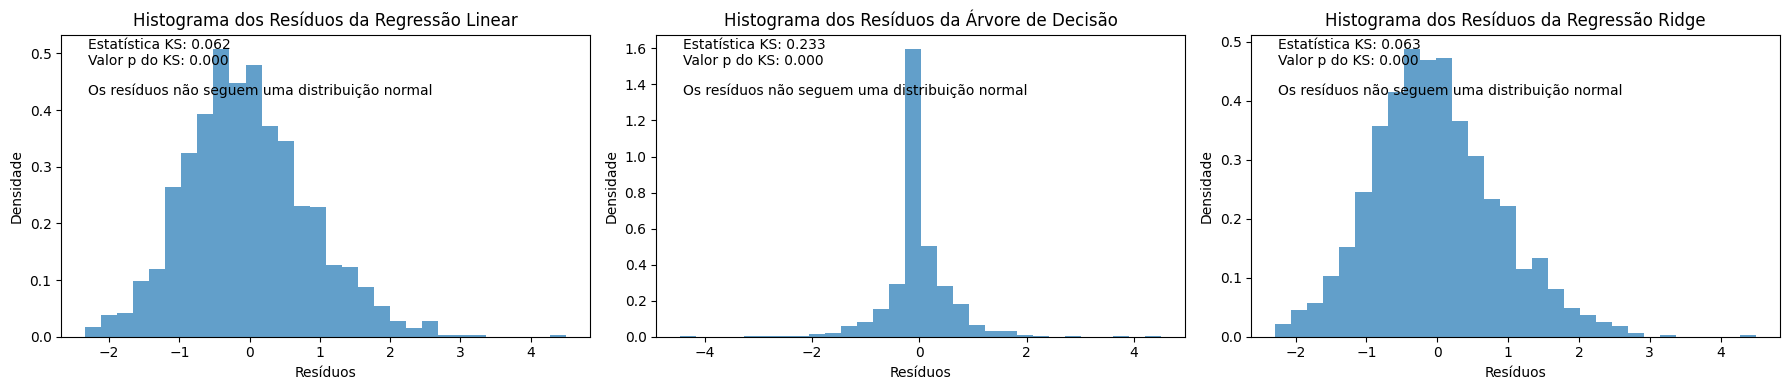

In [13]:
# Calcular os resíduos
linear_residuals = y_val - linear_pred
tree_residuals = y_val - tree_pred
ridge_residuals = y_val - ridge_pred

# Plotar histogramas dos resíduos com resultados do teste KS
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.hist(linear_residuals, bins=30, density=True, alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.title('Histograma dos Resíduos da Regressão Linear')

ks_stat, ks_pvalue = kstest(linear_residuals, 'norm')
plt.text(0.05, 0.9, f"Estatística KS: {ks_stat:.3f}\nValor p do KS: {ks_pvalue:.3f}", transform=plt.gca().transAxes)
if ks_pvalue > 0.05:
    plt.text(0.05, 0.8, "Os resíduos provavelmente seguem uma distribuição normal", transform=plt.gca().transAxes)
else:
    plt.text(0.05, 0.8, "Os resíduos não seguem uma distribuição normal", transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
plt.hist(tree_residuals, bins=30, density=True, alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.title('Histograma dos Resíduos da Árvore de Decisão')

ks_stat, ks_pvalue = kstest(tree_residuals, 'norm')
plt.text(0.05, 0.9, f"Estatística KS: {ks_stat:.3f}\nValor p do KS: {ks_pvalue:.3f}", transform=plt.gca().transAxes)
if ks_pvalue > 0.05:
    plt.text(0.05, 0.8, "Os resíduos provavelmente seguem uma distribuição normal", transform=plt.gca().transAxes)
else:
    plt.text(0.05, 0.8, "Os resíduos não seguem uma distribuição normal", transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
plt.hist(ridge_residuals, bins=30, density=True, alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.title('Histograma dos Resíduos da Regressão Ridge')

ks_stat, ks_pvalue = kstest(ridge_residuals, 'norm')
plt.text(0.05, 0.9, f"Estatística KS: {ks_stat:.3f}\nValor p do KS: {ks_pvalue:.3f}", transform=plt.gca().transAxes)
if ks_pvalue > 0.05:
    plt.text(0.05, 0.8, "Os resíduos provavelmente seguem uma distribuição normal", transform=plt.gca().transAxes)
else:
    plt.text(0.05, 0.8, "Os resíduos não seguem uma distribuição normal", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import shapiro

# Dados da amostra
dados = linear_residuals

# Aplicação do teste de Shapiro-Wilk
stat, p_value = shapiro(dados)

# Exibição do resultado
print('Estatística do teste:', stat)
print('Valor-p:', p_value)


Estatística do teste: 0.9888163208961487
Valor-p: 3.780603385905579e-09


In [17]:
from scipy.stats import shapiro

# Dados da amostra
dados = tree_residuals

# Aplicação do teste de Shapiro-Wilk
stat, p_value = shapiro(dados)

# Exibição do resultado
print('Estatística do teste:', stat)
print('Valor-p:', p_value)


Estatística do teste: 0.8415049910545349
Valor-p: 7.641615133615733e-36


In [18]:
from scipy.stats import shapiro

# Dados da amostra
dados = ridge_residuals

# Aplicação do teste de Shapiro-Wilk
stat, p_value = shapiro(dados)

# Exibição do resultado
print('Estatística do teste:', stat)
print('Valor-p:', p_value)

Estatística do teste: 0.9885153770446777
Valor-p: 2.537266841073915e-09
